# Linear regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

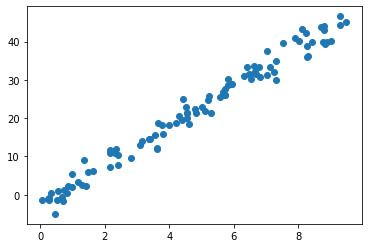

In [3]:
xs = np.random.random(100) * 10
ys = 5 * xs - 2 + 2 * np.random.randn(100)
plt.scatter(xs, ys)

In [7]:
model = LinearRegression()
model.fit(np.c_[xs], ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
xpred = np.r_[:10:5j]
xpred

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [9]:
m, b = model.coef_, model.intercept_
m, b

(array([5.10540106]), -2.4558876793486633)

In [11]:
ypred = m * xpred + b
ypred

array([-2.45588768, 10.30761498, 23.07111764, 35.83462029, 48.59812295])

In [12]:
ypred = model.predict(np.c_[xpred])
ypred

array([-2.45588768, 10.30761498, 23.07111764, 35.83462029, 48.59812295])

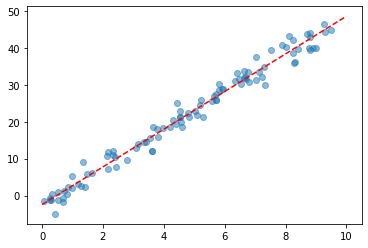

In [13]:
ax = plt.axes()
ax.scatter(xs, ys, alpha=0.5)
ax.plot(xpred, ypred, '--r')

# What about outliers?

In [40]:
ys_outliers = ys.copy()
ys_outliers[0] = 5000

array([13.02228057])

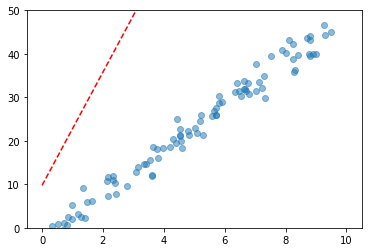

In [41]:
linreg = LinearRegression()
linreg.fit(np.c_[xs], ys_outliers)
ypred_outliers = linreg.predict(np.c_[xpred])

ax = plt.axes()
ax.set(ylim=(0, 50))
ax.scatter(xs, ys_outliers, alpha=0.5)
ax.plot(xpred, ypred_outliers, '--r');
linreg.coef_

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(ys, model.predict(np.c_[xs]))

4.269212141932841

In [43]:
mean_absolute_error(ys, model.predict(np.c_[xs]))

1.6064596158057378

Something a little more complicated...

In [44]:
from sklearn import datasets 

data = datasets.fetch_california_housing()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [45]:
target = pd.Series(data.target)

In [46]:
target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

In [47]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

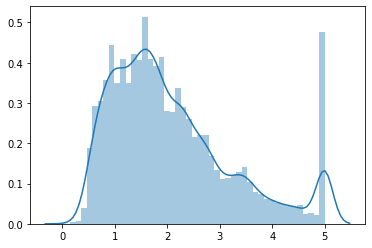

In [48]:
import seaborn as sns
sns.distplot(target)

In [49]:
model = LinearRegression()
model.fit(df, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
mean_squared_error(target, model.predict(df))

0.5243209861846072

In [51]:
mean_absolute_error(target, model.predict(df))

0.5311643817546476

In [52]:
mean_absolute_error(target, model.predict(df)) / target.mean()

0.25678000729780615

Can we do better without outliers?

In [54]:
len(target[target > 4.9])

1031

In [55]:
len(target)

20640

In [56]:
df_filtered = df[target < 4.9]
target_filtered = target[target < 4.9]

In [57]:
model = LinearRegression()
model.fit(df_filtered, target_filtered)
mean_absolute_error(target_filtered, model.predict(df_filtered))

0.4705191549534469

In [58]:
mean_absolute_error(target_filtered, model.predict(df_filtered)) / target.mean()

0.2274623754770366

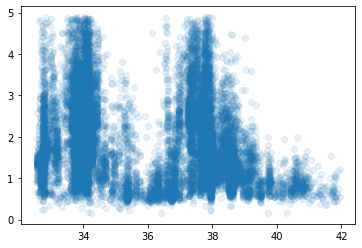

In [66]:
plt.scatter(df_filtered.Latitude, target_filtered, alpha=0.1)

We can get a notion of feature importance by looking at coefficient sizes

In [63]:
model.coef_

array([ 4.26679904e-01,  7.83300674e-03, -1.06873627e-01,  5.95200673e-01,
        5.48519114e-06, -3.37723994e-03, -3.77301840e-01, -3.93483499e-01])

In [64]:
imp = pd.DataFrame(
    pd.Series(model.coef_, index=df.columns, name='coef')
)
imp['abs_coef'] = imp.coef.abs()
imp.sort_values('abs_coef', ascending=False)

,coef,abs_coef
AveBedrms,0.595201,0.595201
MedInc,0.426680,0.426680
Longitude,-0.393483,0.393483
Latitude,-0.377302,0.377302
AveRooms,-0.106874,0.106874
HouseAge,0.007833,0.007833
AveOccup,-0.003377,0.003377
Population,0.000005,0.000005


# Scale, then fit

In [65]:
from sklearn.preprocessing import StandardScaler

linreg = LinearRegression()
X = StandardScaler().fit_transform(df)
linreg.fit(X, target)

imp = pd.DataFrame(
    pd.Series(linreg.coef_, index=df.columns, name='coef')
)
imp['abs_coef'] = imp.coef.abs()
imp.sort_values('abs_coef', ascending=False)

,coef,abs_coef
Latitude,-0.899886,0.899886
Longitude,-0.870541,0.870541
MedInc,0.829619,0.829619
AveBedrms,0.305696,0.305696
AveRooms,-0.265527,0.265527
HouseAge,0.118752,0.118752
AveOccup,-0.039326,0.039326
Population,-0.004503,0.004503


# Lab

Open [Linear Model Lab](sklearn-linear-lab.ipynb)
